### Práctica 24-2 RNA: Clasificación de dígitos manuscritos con una CNN

En esta práctica trabajaremos la clasificacion de digitos manuscritos mediante una CNN y observaremos la\
independencia respecto de la ubicación del dígito sobre el marco de la imagen.
Aún no es totalmente independiente.
Utilizaremos el mismo dataset MNIST que contiene 60.000 imagenes de 28x28x1. 
De estas, 50.000 las utilizaremos para entrenamiento y 10.000 para prueba.

El código se ha comentado para contestualizar cada instrucción.

----------------------------------------------------------------------------------
Respecto del apartado de compilación del modelo hay que aclarar que:\
- El proceso de compilación prepara el modelo para que se pueda entrenar correctamente.\
- Define la estrategia que el modelo seguirá para aprender a partir de los datos de entrenamiento.\
- Sin la compilación, Keras no sabría qué optimizador usar ni cómo evaluar el error durante el entrenamiento.\
- Una vez que el modelo está compilado, podemos proceder con el entrenamiento del modelo.\
- Debemos especificar el optimizador a utilizar, la función de pérdida y las métricas a evaluar.\

El optimizador es el algoritmo que ajusta los pesos de la red para minimizar la función de pérdida durante el entrenamiento:\

Alternativas para "optimice":\
'adam' (Adaptive Moment Estimation) es uno de los más usados por su rapidez y buen desempeño general.

'sgd': Gradiente descendente clásico (stochastic gradient descent).

'rmsprop': Bueno para RNNs.

'adagrad', 'adadelta', 'nadam': Variaciones adaptativas.


La función de pérdida mide el error entre las predicciones del modelo y las etiquetas reales. El objetivo es minimizar esta pérdida durante el entrenamiento.

Alternativas para "loss":\
'sparse_categorical_crossentropy': Se usa para clasificación multiclase cuando las etiquetas son enteros (0,1,2...) 

'categorical_crossentropy': Para clasificación multiclase con etiquetas en one-hot encoding.

'binary_crossentropy': Para clasificación binaria (0 o 1).

'mean_squared_error', 'mean_absolute_error': Para regresión.

'hinge': Para clasificación tipo SVM.


La métrica permite evaluar el rendimiento del modelo durante el entrenamiento y evaluación.

Alternativas para "metrics":\
'accuracy': porcentaje de predicciones correctas.

'mae': Error absoluto medio (útil en regresión).

'mse': Error cuadrático medio.

'Precision', 'Recall', 'AUC': Métricas más específicas para clasificación.

---------------------------------------------------------------------------------------
¿Qué es Data Augmentation?\
Es el proceso de crear nuevas muestras de entrenamiento artificialmente a partir de las que ya tienes, aplicando\ pequeñas transformaciones.

Estas transformaciones ayudan a que la red neuronal aprenda a generalizar mejor, y no se quede "encerrada" en las\ condiciones exactas de las imágenes originales.

Con data augmentation, puedes generar nuevas versiones:\

-Rotada unos grados

-Desplazada ligeramente

-Escalada (más grande o más pequeña)

-Reflejada horizontalmente (en otros casos, no en MNIST)

-Cambiada de brillo o contraste



Estructura de x_entrenamiento: (60000, 28, 28)
Estructura de y_entrenamiento: (60000,)
Estructura de x_prueba: (10000, 28, 28)
Estructura de y_prueba: (10000,)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8152 - loss: 0.5663 - val_accuracy: 0.9815 - val_loss: 0.0554
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9624 - loss: 0.1228 - val_accuracy: 0.9854 - val_loss: 0.0450
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9740 - loss: 0.0841 - val_accuracy: 0.9891 - val_loss: 0.0334
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9799 - loss: 0.0636 - val_accuracy: 0.9860 - val_loss: 0.0398
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9828 - loss: 0.0543 - val_accuracy: 0.9909 - val_loss: 0.0270
313/313 - 1s - 2ms/step - accuracy: 0.9909 - loss: 0.0270
Precisión en los datos de prueba: 0.9908999800682068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


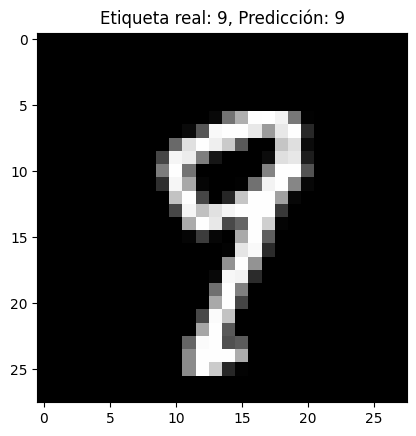

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


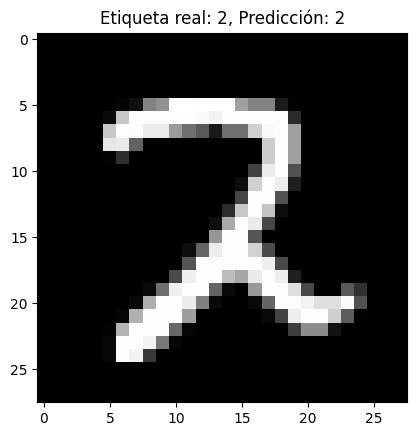

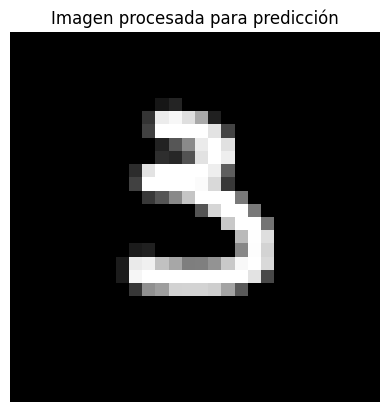

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✍️ Predicción del modelo: 3


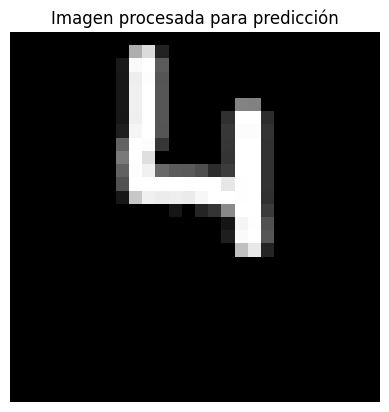

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
✍️ Predicción del modelo: 4


In [4]:
# Importamos las bibliotecas necesarias
import tensorflow as tf  # TensorFlow es la biblioteca principal para construir y entrenar modelos de aprendizaje profundo
from tensorflow.keras import layers, models, Input  # Usamos Keras, una API de alto nivel incluida en TensorFlow
import matplotlib.pyplot as plt  # Para visualizar los datos y resultados
import numpy as np  # Para operaciones matemáticas

import tkinter as tk  # Biblioteca estándar de Python para crear interfaces gráficas de usuario
from PIL import Image, ImageDraw # Librería muy potente para el procesamiento de imágenes 

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Para aplicar data augmentation


# Cargamos el dataset MNIST desde Keras
# MNIST contiene imágenes de dígitos manuscritos (0-9) con sus etiquetas correspondientes
(x_entrenamiento, y_entrenamiento), (x_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()

# Exploramos las dimensiones del dataset
# x_entrenamiento: imágenes de entrenamiento (60,000 imágenes de 28x28 píxeles)
# y_entrenamiento: etiquetas de entrenamiento (números del 0 al 9)
# x_prueba: imágenes de prueba (10,000 imágenes de 28x28 píxeles)
# y_prueba: etiquetas de prueba (números del 0 al 9)
print(f"Estructura de x_entrenamiento: {x_entrenamiento.shape}")
print(f"Estructura de y_entrenamiento: {y_entrenamiento.shape}")
print(f"Estructura de x_prueba: {x_prueba.shape}")
print(f"Estructura de y_prueba: {y_prueba.shape}")

# Normalizamos los valores de los píxeles para que estén en el rango [0, 1]
# Esto mejora el rendimiento del entrenamiento
# Dividimos por 255 porque los valores de los píxeles están en el rango [0, 255]
x_entrenamiento = x_entrenamiento / 255.0  
x_prueba = x_prueba / 255.0

# Añadimos una dimensión extra a los datos para que sean compatibles con la entrada de la red neuronal convolucional
# La nueva forma será (número de imágenes, 28, 28, 1), donde "1" representa un solo canal (escala de grises)
x_entrenamiento = x_entrenamiento[..., tf.newaxis]  # Agregamos una dimensión al final
x_prueba = x_prueba[..., tf.newaxis]


# Creamos el generador con las transformaciones deseadas
datagen = ImageDataGenerator(
    rotation_range=10,          # Rotar imágenes hasta ±10 grados
    width_shift_range=0.1,      # Desplazar horizontalmente hasta el 10%
    height_shift_range=0.1,     # Desplazar verticalmente hasta el 10%
    zoom_range=0.1              # Zoom in/out hasta un 10%
    # Puedes añadir más si quieres: shear_range, brightness_range, etc.
)

# Aplicar el generador a tus datos de entrenamiento
datagen.fit(x_entrenamiento)


# Definimos el modelo de la red neuronal
# Usamos un modelo secuencial, que permite apilar capas una tras otra
# Añadimos una capa convolucional
# Esta capa detecta patrones en las imágenes (como bordes, líneas, etc.)
# 32 filtros, tamaño del kernel (3x3), función de activación ReLU, forma de entrada (28x28x1)

modelo = models.Sequential([
    Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu')
])

# Añadimos una capa de max pooling
# Reduce la dimensionalidad de las características detectadas, conservando las más importantes
# La forma general es     modelo.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# Cuando no se indica strides, por defecto es 2
modelo.add(layers.MaxPooling2D((2, 2)))  # Tamaño del pool (2x2), salto 2

# Añadimos otra capa convolucional
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 64 filtros, tamaño del kernel (3x3)

# Añadimos otra capa de max pooling
modelo.add(layers.MaxPooling2D((2, 2)))

# Aplanamos las características para pasarlas a una capa densa
modelo.add(layers.Flatten())  # Convierte las características en un vector unidimensional

# Añadimos una capa densa (totalmente conectada)
modelo.add(layers.Dense(64, activation='relu'))  # 64 neuronas, función de activación ReLU

# Añadimos la capa de salida
# Tiene 10 neuronas (una por cada dígito del 0 al 9) y usa softmax para obtener probabilidades
modelo.add(layers.Dense(10, activation='softmax'))

# Compilamos el modelo
modelo.compile(optimizer='adam',  # Optimizador Adam, eficiente y ampliamente utilizado
               loss='sparse_categorical_crossentropy',  # Pérdida adecuada para clasificación multiclase
               metrics=['accuracy'])  # Métrica para evaluar el rendimiento

# Entrenamos el modelo usando el generador anterior
# Especificamos los datos de entrenamiento, las etiquetas, el número de épocas y los datos de validación
historia = modelo.fit(datagen.flow(x_entrenamiento, y_entrenamiento, batch_size=32), epochs=5, validation_data=(x_prueba, y_prueba))


# Evaluamos el modelo con los datos de prueba
# Calculamos la precisión final del modelo
test_loss, test_acc = modelo.evaluate(x_prueba, y_prueba, verbose=2)
print(f"Precisión en los datos de prueba: {test_acc}")

# Visualizamos algunas predicciones
# Elegimos una imagen de prueba aleatoria y mostramos la predicción del modelo
indice = np.random.randint(0, len(x_prueba))  # Seleccionamos un índice aleatorio
imagen = x_prueba[indice]  # Obtenemos la imagen correspondiente
etiqueta_real = y_prueba[indice]  # Obtenemos la etiqueta real

# Hacemos la predicción
#prediccion = modelo.predict(imagen[np.newaxis, ...])  # Añadimos una dimensión para que coincida con la entrada del modelo
prediccion = modelo.predict(imagen.reshape(1, 28, 28))
digito_predicho = np.argmax(prediccion)  # Tomamos el índice del valor máximo (la clase predicha)

# Mostramos la imagen y la predicción
plt.imshow(imagen[:, :, 0], cmap='gray')  # Mostramos la imagen en escala de grises
plt.title(f"Etiqueta real: {etiqueta_real}, Predicción: {digito_predicho}")
plt.show()

#----------------------------------------------------------------------------------

# Elegimos una imagen de prueba aleatoria y mostramos la predicción del modelo
indice = np.random.randint(0, len(x_prueba))  # Seleccionamos un índice aleatorio
imagen = x_prueba[indice]  # Obtenemos la imagen correspondiente
etiqueta_real = y_prueba[indice]  # Obtenemos la etiqueta real

# Hacer una predicción con una nueva imagen
#prediccion = modelo.predict(imagen[np.newaxis, ...]) # Contiene las probabilidades de cada clase 
prediccion = modelo.predict(imagen.reshape(1, 28, 28))
digito_predicho = np.argmax(prediccion)  # Tomamos el índice del valor máximo (la clase predicha)

# Mostramos la imagen y la predicción
plt.imshow(imagen[:, :, 0], cmap='gray')  # Mostramos la imagen en escala de grises
plt.title(f"Etiqueta real: {etiqueta_real}, Predicción: {digito_predicho}")
plt.show()

#---------------------------------------------------------------------------
# Creamos una ventana donde escribir con el ratón un digito

# Clase para la ventana de dibujo
class DigitoDibujado:
    def __init__(self, modelo):
        self.modelo = modelo
        self.ventana = tk.Tk()
        self.ventana.title("Dibuja un dígito (0-9)")
        
        # Crear lienzo de dibujo
        self.canvas = tk.Canvas(self.ventana, width=200, height=200, bg="black")
        self.canvas.pack()
        
        # Imagen PIL donde se guardará el dibujo
        self.imagen = Image.new("L", (200, 200), color=0)
        self.draw = ImageDraw.Draw(self.imagen)

        # Eventos de dibujo
        self.canvas.bind("<B1-Motion>", self.dibujar)
        
        # Botón para predecir el dígito
        btn_predecir = tk.Button(self.ventana, text="Predecir", command=self.predecir)
        btn_predecir.pack()

        # Botón para limpiar el dibujo
        btn_limpiar = tk.Button(self.ventana, text="Limpiar", command=self.limpiar)
        btn_limpiar.pack()

        self.ventana.mainloop()

    def dibujar(self, evento):
        # Dibuja un círculo blanco donde se arrastra el ratón
        x, y = evento.x, evento.y
        radio = 8
        self.canvas.create_oval(x - radio, y - radio, x + radio, y + radio, fill="white", outline="white")
        self.draw.ellipse([x - radio, y - radio, x + radio, y + radio], fill=255)

    def predecir(self):
        # Redimensionamos la imagen a 28x28
        imagen_redimensionada = self.imagen.resize((28, 28), Image.LANCZOS)

        imagen_np = np.array(imagen_redimensionada)

        # Aplicamos umbral para quitar ruido
        imagen_np = np.where(imagen_np > 20, imagen_np, 0)

        # Normalizamos a rango [0, 1]
        imagen_np = imagen_np / 255.0

        # Mostramos la imagen procesada para ver cómo la recibe el modelo
        plt.imshow(imagen_np, cmap='gray')
        plt.title("Imagen procesada para predicción")
        plt.axis('off')
        plt.show()

        # Redimensionamos para que el modelo pueda procesarla (batch, alto, ancho)
        imagen_np = imagen_np.reshape(1, 28, 28)

        # Predicción
        prediccion = self.modelo.predict(imagen_np)
        etiqueta = np.argmax(prediccion)
        print(f"Predicción del modelo: {etiqueta}")


    def limpiar(self):
        # Limpia el lienzo y la imagen
        self.canvas.delete("all")
        self.imagen = Image.new("L", (200, 200), color=0)
        self.draw = ImageDraw.Draw(self.imagen)

# Iniciar la ventana de dibujo
DigitoDibujado(modelo)


Ejercicio: Observamos que, aunque hemos ganado cierta independencia respecto de la ubicación de la imagen, aun no es totalmente independiente. Modificar la CNN incrementando el nº de capas de convolución, primero una más y luego con dos más y comprobar la mejoría.